# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st


## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
path= 'D:\\TripleTen\\Sprint 4_ Análisis estadístico de datos\\Proyecto\\'

calls= pd.read_csv(path + 'megaline_calls.csv')
internet= pd.read_csv(path +'megaline_internet.csv')
messages= pd.read_csv(path +'megaline_messages.csv')
plans= pd.read_csv(path +'megaline_plans.csv')
users= pd.read_csv(path +'megaline_users.csv')

## Preparar los datos

Los datos para este proyecto se dividen en varias tablas. 

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()
plans.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [4]:
# Imprime una muestra de los datos para las tarifas
plans.sample(2)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1000,30720,3000,70,7,0.01,0.01,ultimate
0,50,15360,500,20,10,0.03,0.03,surf


Un problema es que la cantidad de megabytes está en "mb", justamente, pero el cobro se realiza a partir de gigabytes, por lo que sería conveniente convertir esta columna a Gb. Adicionalmente, no existen problemas con otras columnas.

## Corregir datos

In [5]:
gb_per_month_included = plans['mb_per_month_included'] / 1024
gb_per_month_included = gb_per_month_included.astype('int')
gb_per_month_included

0    15
1    30
Name: mb_per_month_included, dtype: int32

## Enriquecer los datos

[Agregando factores adicionales a los datos que se cree que pudieran ser útiles.]

In [6]:
plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024
plans['gb_per_month_included'] = gb_per_month_included.astype('int')
plans.rename(columns= {"plan_name": "plan"}, inplace=True)
plans.drop(columns= "mb_per_month_included", inplace=True)
plans


,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan,gb_per_month_included
0,50,500,20,10,0.03,0.03,surf,15
1,1000,3000,70,7,0.01,0.01,ultimate,30


## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Imprime una muestra de datos para usuarios
users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
243,1243,Isaias,Compton,71,"Phoenix-Mesa-Chandler, AZ MSA",2018-05-11,surf,NaN
447,1447,Ramon,Hester,62,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-01,surf,NaN
483,1483,Miguel,Farrell,35,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-04-25,surf,NaN
204,1204,Sherly,Levy,44,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-08-20,ultimate,NaN
184,1184,Fredric,Middleton,39,"Sacramento–Roseville–Folsom, CA MSA",2018-03-07,ultimate,NaN


In [9]:
users['churn_date'].isna().sum()

466

Primero, la columna "user_id" es de tipo entero, lo más adecuado sería cambiarla a tipo string. Segundo, la columna "reg_date" está como tipo string, lo ideal sería tenerle en un formato de fecha. Finalmente, la columna "churn_date" presenta valores ausentes. Sin embargo, estos valores ausentes son importantes para el conjunto de datos, por lo que no pueden ser eliminados. Sería una buena idea reeplazar los valores ausenets por otro dato para que sea mas claro y se pueda tener una mejor manipulación.

In [10]:
users.duplicated().sum()

0

### Corregir los datos

In [11]:
users['user_id'] = users['user_id'].astype('str')
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = users['churn_date'].fillna(value= 'In use')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 31.4+ KB


### Enriquecer los datos

In [12]:
print( "Los usuarios del plan Surf son:", users["plan"][users["plan"] == "surf"].count())
print( "Los usuarios del plan Ultimate son:", users["plan"][users["plan"] == "ultimate"].count())

Los usuarios del plan Surf son: 339
Los usuarios del plan Ultimate son: 161


## Llamadas

In [13]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [14]:
calls.sample(5)# Imprime una muestra de datos para las llamadas

,id,user_id,call_date,duration
127748,1458_22,1458,2018-11-28,1.26
120285,1419_9,1419,2018-12-07,6.98
62807,1226_206,1226,2018-09-19,0.00
40707,1150_418,1150,2018-10-11,17.24
22426,1082_444,1082,2018-06-02,5.37


Primero, el nombre de la columna "id" no es lo suficientemente claro, vale la pena renombrar esa columna para tener mas claridad. Segundo, la columna "user_id" es de tipo int, sería mejor cambiarla a tipo string. La columna "call_date es de tipo string, sería mas conveniente manejarla como tipo dt.

No existen duplicado en calls

In [15]:
calls.duplicated().sum()

0

### Corregir los datos

In [16]:
column_new ={
    "id": "call_id"
}
calls.rename(columns= column_new, inplace=True)
calls['user_id']= calls['user_id'].astype('str')
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   call_id    137735 non-null  object        
 1   user_id    137735 non-null  object        
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.2+ MB


### Enriquecer los datos

In [17]:
calls['duration_ceil']= calls['duration'].apply(np.ceil)
calls[calls['duration_ceil'] == 0]

,call_id,user_id,call_date,duration,duration_ceil
19,1001_4,1001,2018-12-05,0.0,0.0
25,1001_13,1001,2018-12-24,0.0,0.0
31,1001_30,1001,2018-10-17,0.0,0.0
32,1001_31,1001,2018-11-03,0.0,0.0
34,1001_35,1001,2018-12-21,0.0,0.0
...,...,...,...,...,...
137714,1499_183,1499,2018-11-10,0.0,0.0
137715,1499_184,1499,2018-09-15,0.0,0.0
137720,1499_189,1499,2018-12-27,0.0,0.0
137722,1499_191,1499,2018-12-24,0.0,0.0


## Mensajes

In [18]:
messages.info()# Imprime la información general/resumida sobre el DataFrame de los mensajes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [19]:
messages.sample(5)# Imprime una muestra de datos para los mensajes

,id,user_id,message_date
23383,1142_31,1142,2018-10-27
55558,1349_229,1349,2018-10-29
53,1001_89,1001,2018-10-31
58438,1370_170,1370,2018-11-23
73078,1470_706,1470,2018-07-06


In [20]:
messages.duplicated().sum()

0

La columna "id" no tiene un nombre lo suficientemente claro. la columna "user_id" es de tipo entero, es conveniente tenerla como str. La columna "mesagge_date" estaría mejor como tipo dt.

No existen duplicados en messages

### Corregir los datos

In [21]:
mcolumn_new ={
    "id": "messages_id"
}
messages.rename(columns= mcolumn_new, inplace=True)
messages['user_id']= messages['user_id'].astype('str')
messages['message_date']= pd.to_datetime(messages['message_date'])

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   messages_id   76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


### Enriquecer los datos

## Internet

In [22]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [23]:
# Imprime una muestra de datos para el tráfico de internet
internet.sample(5)

,id,user_id,session_date,mb_used
92986,1434_220,1434,2018-11-21,412.58
65116,1299_404,1299,2018-09-25,117.77
104447,1498_521,1498,2018-08-08,981.77
21000,1098_17,1098,2018-11-10,889.96
97994,1461_161,1461,2018-09-30,195.16


In [24]:
internet.duplicated().sum()

0

La columna "id" no es muy clara. "user_id" estaría mejor si fuera de tipo str. "session_date" debería estar como tipo de dato dt. Valdría la pena crear una columna gb_used en vez de mb_used para hacer cálculos posteriores. 

NO existen duplicados en interent

### Corregir los datos

In [25]:
icolumn= {
    "id": "internet_id"
}
internet.rename(columns= icolumn, inplace=True)
internet['user_id']= internet['user_id'].astype(str)
internet['session_date']= pd.to_datetime(internet['session_date'])
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   internet_id   104825 non-null  object        
 1   user_id       104825 non-null  object        
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.2+ MB


### Enriquecer los datos

In [26]:
gb_used= internet['mb_used'] / 1024
internet['gb_used']= internet['mb_used'] / 1024
internet.sample(5)

,internet_id,user_id,session_date,mb_used,gb_used
13148,1062_118,1062,2018-06-19,275.60,0.269141
37158,1167_81,1167,2018-08-20,259.59,0.253506
36353,1164_36,1164,2018-07-24,379.24,0.370352
64451,1295_488,1295,2018-11-02,178.45,0.174268
6081,1033_142,1033,2018-10-05,370.71,0.362021


## Estudiar las condiciones de las tarifas

In [27]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   minutes_included       2 non-null      int64  
 2   usd_monthly_pay        2 non-null      int64  
 3   usd_per_gb             2 non-null      int64  
 4   usd_per_message        2 non-null      float64
 5   usd_per_minute         2 non-null      float64
 6   plan                   2 non-null      object 
 7   gb_per_month_included  2 non-null      int32  
dtypes: float64(2), int32(1), int64(4), object(1)
memory usage: 252.0+ bytes


In [28]:
plans

,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan,gb_per_month_included
0,50,500,20,10,0.03,0.03,surf,15
1,1000,3000,70,7,0.01,0.01,ultimate,30


## Agregar datos por usuario

[Ahora que los datos están limpios, agregamos los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [29]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls['month']= calls['call_date'].dt.to_period("M")
monthly_calls_per_user=(
calls
    .groupby(["user_id", 'month'])["call_id"]
    .count()
    .reset_index()
    .rename(columns={'call_id': 'n_calls'})
)
monthly_calls_per_user

,user_id,month,n_calls
0,1000,2018-12,16
1,1001,2018-08,27
2,1001,2018-09,49
3,1001,2018-10,65
4,1001,2018-11,64
...,...,...,...
2253,1498,2018-12,39
2254,1499,2018-09,41
2255,1499,2018-10,53
2256,1499,2018-11,45


<Axes: title={'center': 'Número de llamadas hechas por cada usuario al mes'}, xlabel='llamadas', ylabel='Frequency'>

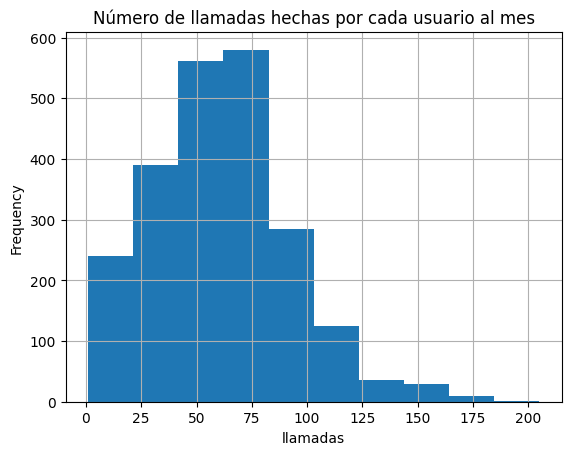

In [30]:
monthly_calls_per_user['n_calls'].plot(title= 'Número de llamadas hechas por cada usuario al mes', kind= 'hist', xlabel= 'llamadas', grid=True)

In [31]:
mcpu= calls.groupby(["user_id", "call_date"])['call_id'].count()
mcpu.head(20)

user_id  call_date 
1000     2018-12-26    2
         2018-12-27    5
         2018-12-28    4
         2018-12-29    1
         2018-12-30    1
         2018-12-31    3
1001     2018-08-14    2
         2018-08-16    4
         2018-08-17    1
         2018-08-18    1
         2018-08-19    1
         2018-08-20    1
         2018-08-21    1
         2018-08-23    2
         2018-08-24    1
         2018-08-25    3
         2018-08-27    3
         2018-08-28    2
         2018-08-29    3
         2018-08-31    2
Name: call_id, dtype: int64

In [32]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
monthly_duration_per_user= (
calls
    .groupby(["user_id", "month"])["duration_ceil"]
    .sum()
    .reset_index()
    .rename(columns={'duration_ceil': 'n_minutes'})
)
monthly_duration_per_user

,user_id,month,n_minutes
0,1000,2018-12,124.0
1,1001,2018-08,182.0
2,1001,2018-09,315.0
3,1001,2018-10,393.0
4,1001,2018-11,426.0
...,...,...,...
2253,1498,2018-12,339.0
2254,1499,2018-09,346.0
2255,1499,2018-10,385.0
2256,1499,2018-11,308.0


In [33]:
mmpu= calls.groupby(["user_id", "duration_ceil"])["call_id"].count()
mmpu.head(20)

user_id  duration_ceil
1000     2.0               1
         3.0               1
         4.0               1
         5.0               3
         6.0               4
         9.0               1
         10.0              1
         13.0              1
         14.0              1
         15.0              2
1001     0.0              59
         1.0              12
         2.0              14
         3.0              12
         4.0              11
         5.0               8
         6.0              20
         7.0              20
         8.0              14
         9.0              14
Name: call_id, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

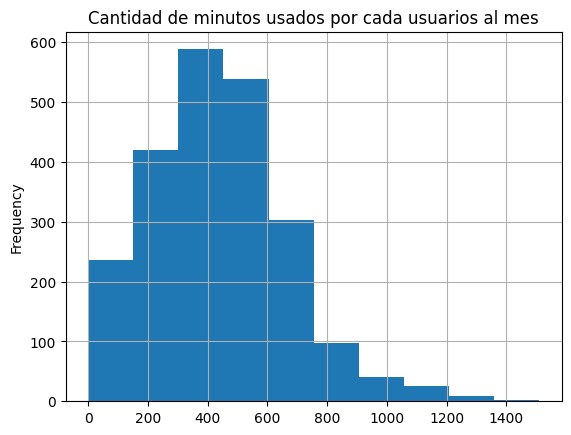

In [34]:
monthly_duration_per_user['n_minutes'].plot(title= 'Cantidad de minutos usados por cada usuarios al mes', kind= 'hist', grid=True)
plt.show

In [35]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages['month']= messages['message_date'].dt.to_period("M")

monthly_messages_per_user=(
messages
    .groupby(["user_id", 'month'])["messages_id"]
    .count()
    .reset_index()
    .rename(columns={'messages_id': 'n_messages'}) 
)
monthly_messages_per_user


,user_id,month,n_messages
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36
...,...,...,...
1801,1496,2018-09,21
1802,1496,2018-10,18
1803,1496,2018-11,13
1804,1496,2018-12,11


<function matplotlib.pyplot.show(close=None, block=None)>

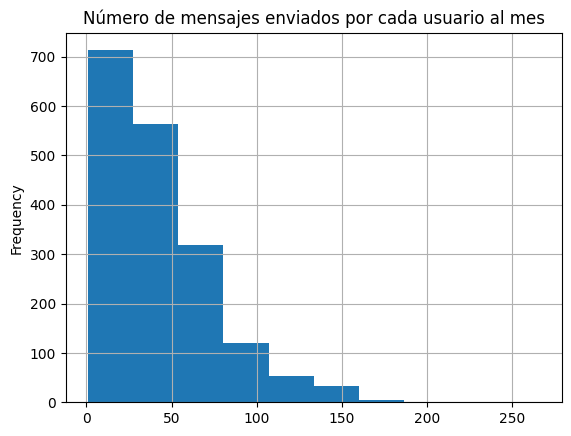

In [36]:
monthly_messages_per_user['n_messages'].plot(title= 'Número de mensajes enviados por cada usuario al mes', kind= 'hist', grid=True)
plt.show

In [37]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet['month']= internet['session_date'].dt.to_period("M")

monthly_traffic_per_user=(
internet
    .groupby(["user_id", 'month'])["gb_used"]
    .sum()
    .reset_index()
    .rename(columns={'gb_used': 'n_gb'})
)
monthly_traffic_per_user


,user_id,month,n_gb
0,1000,2018-12,1.856904
1,1001,2018-08,6.756982
2,1001,2018-09,13.002754
3,1001,2018-10,21.807119
4,1001,2018-11,18.070605
...,...,...,...
2272,1498,2018-12,22.595400
2273,1499,2018-09,12.680430
2274,1499,2018-10,19.035576
2275,1499,2018-11,16.419756


In [38]:
#redondeando los gb
monthly_traffic_per_user['n_gb']= monthly_traffic_per_user['n_gb'].apply(np.ceil) 
monthly_traffic_per_user

,user_id,month,n_gb
0,1000,2018-12,2.0
1,1001,2018-08,7.0
2,1001,2018-09,14.0
3,1001,2018-10,22.0
4,1001,2018-11,19.0
...,...,...,...
2272,1498,2018-12,23.0
2273,1499,2018-09,13.0
2274,1499,2018-10,20.0
2275,1499,2018-11,17.0


<function matplotlib.pyplot.show(close=None, block=None)>

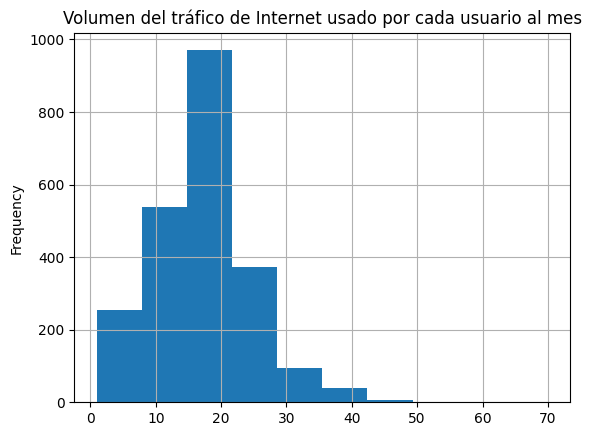

In [39]:
monthly_traffic_per_user['n_gb'].plot(title= 'Volumen del tráfico de Internet usado por cada usuario al mes', kind= 'hist', grid=True)
plt.show

In [40]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
merge= (monthly_calls_per_user
 .merge(monthly_duration_per_user, on= ["user_id", "month"], how= "outer")
 .merge(monthly_messages_per_user, on= ["user_id", "month"], how= "outer")
 .merge(monthly_traffic_per_user, on= ["user_id", "month"], how= "outer")
 .fillna(0)
 .merge(users[["user_id", "plan", "city"]], on= "user_id")
)
merge

,user_id,month,n_calls,n_minutes,n_messages,n_gb,plan,city
0,1000,2018-12,16.0,124.0,11.0,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,2018-08,27.0,182.0,30.0,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,2018-09,49.0,315.0,44.0,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,2018-10,65.0,393.0,53.0,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,2018-11,64.0,426.0,36.0,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...,...,...,...,...,...
2288,1498,2018-12,39.0,339.0,0.0,23.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA"
2289,1499,2018-09,41.0,346.0,0.0,13.0,surf,"Orlando-Kissimmee-Sanford, FL MSA"
2290,1499,2018-10,53.0,385.0,0.0,20.0,surf,"Orlando-Kissimmee-Sanford, FL MSA"
2291,1499,2018-11,45.0,308.0,0.0,17.0,surf,"Orlando-Kissimmee-Sanford, FL MSA"


In [41]:
# Añade la información de la tarifa
table= merge.merge(plans, on= "plan")
table

,user_id,month,n_calls,n_minutes,n_messages,n_gb,plan,city,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
0,1000,2018-12,16.0,124.0,11.0,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,3000,70,7,0.01,0.01,30
1,1001,2018-08,27.0,182.0,30.0,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,500,20,10,0.03,0.03,15
2,1001,2018-09,49.0,315.0,44.0,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,500,20,10,0.03,0.03,15
3,1001,2018-10,65.0,393.0,53.0,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,500,20,10,0.03,0.03,15
4,1001,2018-11,64.0,426.0,36.0,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,500,20,10,0.03,0.03,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,2018-12,39.0,339.0,0.0,23.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",50,500,20,10,0.03,0.03,15
2289,1499,2018-09,41.0,346.0,0.0,13.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",50,500,20,10,0.03,0.03,15
2290,1499,2018-10,53.0,385.0,0.0,20.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",50,500,20,10,0.03,0.03,15
2291,1499,2018-11,45.0,308.0,0.0,17.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",50,500,20,10,0.03,0.03,15


In [42]:
# Calcula el ingreso mensual para cada usuario
table["llamadas_dif"]= table["n_minutes"] - table["minutes_included"]
table["messages_dif"]= table["n_messages"] - table["messages_included"] 
table["gb_dif"]= table["n_gb"] - table["gb_per_month_included"]

table["llamadas_dif"]= table["llamadas_dif"].where(table["llamadas_dif"] > 0, 0)
table["messages_dif"]= table["messages_dif"].where(table["messages_dif"] > 0, 0)
table["gb_dif"]= table["gb_dif"].where(table["gb_dif"] > 0, 0)

table.sample(10, random_state=1095)

,user_id,month,n_calls,n_minutes,n_messages,n_gb,plan,city,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,llamadas_dif,messages_dif,gb_dif
1562,1338,2018-10,86.0,645.0,0.0,16.0,surf,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",50,500,20,10,0.03,0.03,15,145.0,0.0,1.0
678,1142,2018-11,54.0,433.0,47.0,19.0,surf,"New Orleans-Metairie, LA MSA",50,500,20,10,0.03,0.03,15,0.0,0.0,4.0
1517,1329,2018-12,191.0,1369.0,97.0,26.0,ultimate,"Charleston-North Charleston, SC MSA",1000,3000,70,7,0.01,0.01,30,0.0,0.0,0.0
981,1203,2018-10,89.0,670.0,51.0,17.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",50,500,20,10,0.03,0.03,15,170.0,1.0,2.0
1377,1296,2018-12,54.0,369.0,24.0,15.0,ultimate,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",1000,3000,70,7,0.01,0.01,30,0.0,0.0,0.0
943,1196,2018-05,66.0,431.0,30.0,23.0,ultimate,"Los Angeles-Long Beach-Anaheim, CA MSA",1000,3000,70,7,0.01,0.01,30,0.0,0.0,0.0
1877,1403,2018-05,29.0,240.0,0.0,28.0,ultimate,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",1000,3000,70,7,0.01,0.01,30,0.0,0.0,0.0
1292,1274,2018-12,45.0,357.0,17.0,17.0,ultimate,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",1000,3000,70,7,0.01,0.01,30,0.0,0.0,0.0
2285,1498,2018-09,45.0,363.0,0.0,23.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",50,500,20,10,0.03,0.03,15,0.0,0.0,8.0
625,1132,2018-06,93.0,746.0,143.0,26.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,3000,70,7,0.01,0.01,30,0.0,0.0,0.0


In [43]:
table.columns

Index(['user_id', 'month', 'n_calls', 'n_minutes', 'n_messages', 'n_gb',
       'plan', 'city', 'messages_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'gb_per_month_included', 'llamadas_dif', 'messages_dif', 'gb_dif'],
      dtype='object')

In [44]:
# Ingreso mensual para cada usuario:
table["monthly_income"] = table['usd_monthly_pay'] + table['usd_per_gb'] * table['gb_dif'] + table['usd_per_message'] * table['messages_dif'] + table['usd_per_minute'] * table['llamadas_dif']
print("Ingreso mensual para cada usuario:")
table["monthly_income"].sample(10, random_state=1095)

Ingreso mensual para cada usuario:


1562     34.35
678      60.00
1517     70.00
981      45.13
1377     70.00
943      70.00
1877     70.00
1292     70.00
2285    100.00
625      70.00
Name: monthly_income, dtype: float64

In [45]:
print("Ingreso total:", table["monthly_income"].sum())

Ingreso total: 147557.18


## Estudia el comportamiento de usuario

### Llamadas

In [46]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
llamadas_prom_por_plan_month=(
table
    .groupby(['month', "plan"])["n_minutes"]
    .mean()  
    ).reset_index().pivot(index="month", columns= "plan", values= "n_minutes")


llamadas_prom_por_plan_month


plan,surf,ultimate
month,,
2018-01,203.000000,193.500000
2018-02,297.000000,403.142857
2018-03,330.000000,304.250000
2018-04,351.540000,336.857143
2018-05,399.584416,406.241379
2018-06,431.298969,370.957447
2018-07,449.983471,427.067797
2018-08,410.111111,421.436620
2018-09,414.226804,437.511628


In [47]:
llamadas_prom_por_plan_month.mean()

plan
surf        384.469691
ultimate    387.999742
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

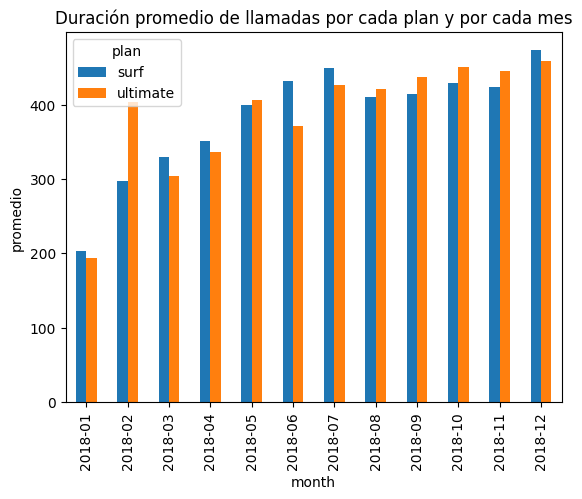

In [48]:
llamadas_prom_por_plan_month.plot(                   
                                 kind="bar",
                                 title= "Duración promedio de llamadas por cada plan y por cada mes",
                                 xlabel= "month",
                                 ylabel= "promedio")

plt.show
                                    

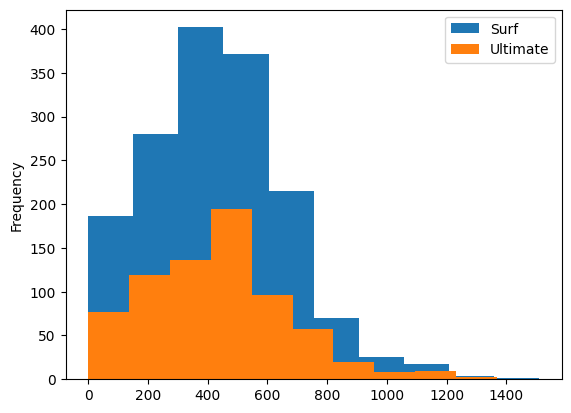

In [49]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
table[table["plan"] == "surf"]["n_minutes"].plot(kind= "hist")
table[table["plan"] == "ultimate"]["n_minutes"].plot(kind= "hist")
plt.legend(['Surf', 'Ultimate'])
plt.show()

In [50]:
# Calcula la media y la varianza de la duración mensual de llamadas.
var_llamadas=(
table
    .pivot_table(index= 'month', columns= "plan", values= "n_minutes", aggfunc= ["mean", "var"])
      
)
var_llamadas

mean                       var              
plan           surf    ultimate          surf      ultimate
month                                                      
2018-01  203.000000  193.500000  15842.000000  16572.333333
2018-02  297.000000  403.142857  52226.500000  76889.476190
2018-03  330.000000  304.250000  35809.363636  61984.931818
2018-04  351.540000  336.857143  50866.743265  34888.928571
2018-05  399.584416  406.241379  59754.219754  43841.046798
2018-06  431.298969  370.957447  45592.628436  42503.563367
2018-07  449.983471  427.067797  61005.099725  72563.374635
2018-08  410.111111  421.436620  54344.645963  53645.506640
2018-09  414.226804  437.511628  46595.958656  57070.464569
2018-10  429.729958  450.735849  52278.664056  54261.910512
2018-11  423.325088  445.196850  51607.021602  60593.222847
2018-12  473.836478  459.099338  63629.518918  62503.783400

<Axes: ylabel='n_minutes'>

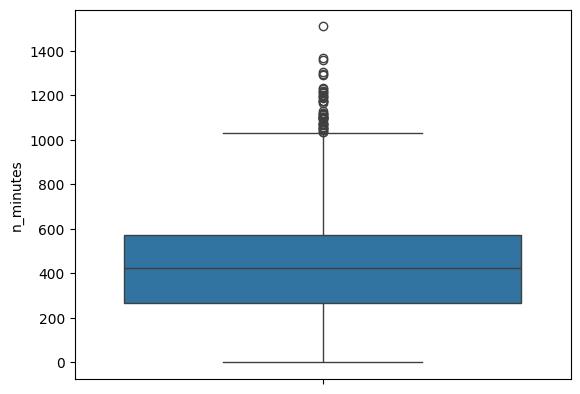

In [51]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
caja_llamadas= pd.Series(table["n_minutes"])
sns.boxplot(caja_llamadas)

Conclusiones sobre el comportamiento de los usuarios:

- En cuanto a la duración promedio mensual de cada plan, estas son bastante parejas. en promedio la duración de de llamadas en cada plan es casi la misma. 
- En lo que se refiere a la cantidad de minutos mensuales que necesitan los usuarios de cada plan, se puede evideciar que los usuarios del plan Surf, necesitan mayr cantidad de minutos, alrededor de 400 en su punto mas alto, mientyras que los usuarios del plan Ultimate, solamente necesitan alrededor de 200 en su punto más alto. 
- las medias y las varianzas mensuales en cada plan tambien son similares en cada mes. 
- La media de la distribución mensual de las llamadas es de un poco más de 400 minutos. Donde el valor mínimo es de 0 minutos y el máximo de poco más de 1000 minutos. Exiten también algunos valores atípicos en la distribución de la duración mensual de las llamadas. 

### Mensajes

In [52]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
mensajes_por_plan_month= table.pivot_table(index= "month", 
                                          columns= "plan",
                                          values= "n_messages",
                                          aggfunc= "sum")
mensajes_por_plan_month


plan,surf,ultimate
month,,
2018-01,21.0,62.0
2018-02,108.0,151.0
2018-03,351.0,243.0
2018-04,870.0,463.0
2018-05,1849.0,931.0
2018-06,2454.0,1379.0
2018-07,3271.0,1937.0
2018-08,4662.0,2732.0
2018-09,5968.0,3259.0


<function matplotlib.pyplot.show(close=None, block=None)>

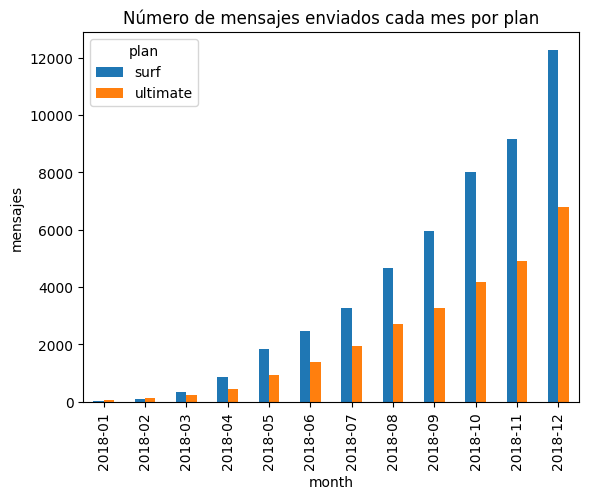

In [53]:
mensajes_por_plan_month.plot(                   
                                 kind="bar",
                                 title= "Número de mensajes enviados cada mes por plan",
                                 xlabel= "month",
                                 ylabel= "mensajes")

plt.show

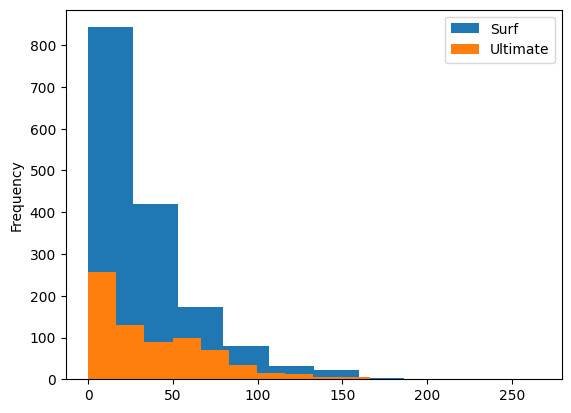

In [54]:
table[table["plan"] == "surf"]["n_messages"].plot(kind= "hist")
table[table["plan"] == "ultimate"]["n_messages"].plot(kind= "hist")
plt.legend(['Surf', 'Ultimate'])
plt.show()

In [55]:
ests_messages=(
table
    .pivot_table(index= 'month', columns= "plan", values= "n_messages", aggfunc= ["mean", "var"])
      
)
ests_messages


mean                     var             
plan          surf   ultimate         surf     ultimate
month                                                  
2018-01  10.500000  15.500000   220.500000   313.666667
2018-02  12.000000  21.571429   386.000000   478.285714
2018-03  15.260870  20.250000   346.565217   654.386364
2018-04  17.400000  22.047619   501.591837   544.147619
2018-05  24.012987  32.103448   847.197198  1297.310345
2018-06  25.298969  29.340426   914.920103   857.620722
2018-07  27.033058  32.830508   923.915565   960.488019
2018-08  28.777778  38.478873  1029.515528  1196.367404
2018-09  30.762887  37.895349  1003.829496  1050.918331
2018-10  33.839662  39.443396  1275.465708  1221.106289
2018-11  32.385159  38.606299  1065.344034  1232.669166
2018-12  38.600629  45.006623  1458.158612  1549.419956

<Axes: ylabel='n_messages'>

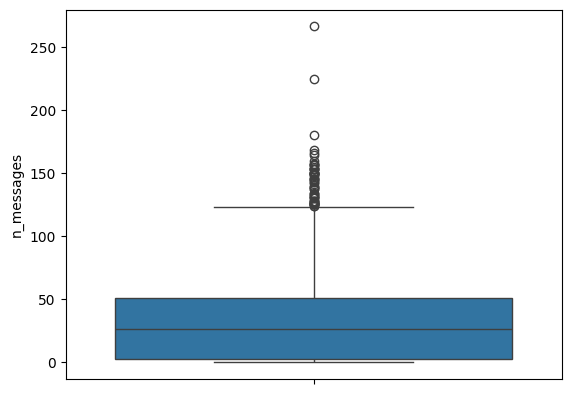

In [56]:
caja_mensajes= pd.Series(table["n_messages"])
sns.boxplot(caja_mensajes)

- El número de mensajes que tienden a enviar mensualmente los usuarios de cada plan si tiene diferencias considerables. Se observa que los usuarios del plan Surf envían el doble de mensajes que los usuarios del plan Ultimate, con un máximo de 12.000 mensajes en diciembre del 2018.
- La media de mensajes enviados en ambos planes es de 25 mensajes aprox, con un mínimo de 0 mensajes y un máximo de 125. Aunque, existen algunos valores atípicos de usuarios que envían incluso más de 250 mensajes. 

### Internet

In [57]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
internet_por_plan_month= table.pivot_table(index= "month", 
                                          columns= "plan",
                                          values= "n_gb",
                                          aggfunc= "sum")
internet_por_plan_month

plan,surf,ultimate
month,,
2018-01,10.0,29.0
2018-02,110.0,121.0
2018-03,312.0,221.0
2018-04,611.0,343.0
2018-05,1087.0,489.0
2018-06,1502.0,725.0
2018-07,2042.0,973.0
2018-08,2735.0,1267.0
2018-09,3238.0,1463.0


<function matplotlib.pyplot.show(close=None, block=None)>

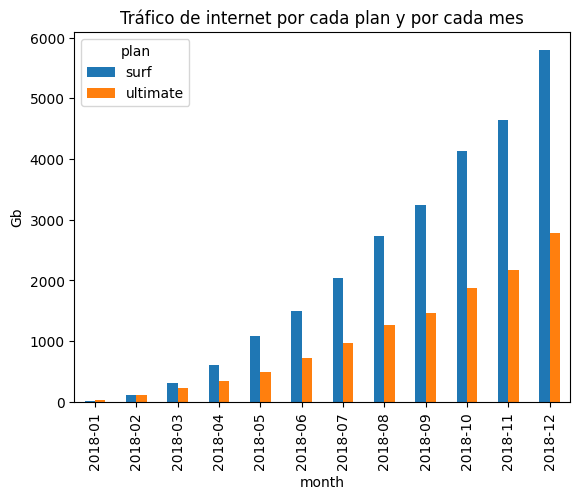

In [58]:
internet_por_plan_month.plot(                   
                                 kind="bar",
                                 title= "Tráfico de internet por cada plan y por cada mes",
                                 xlabel= "month",
                                 ylabel= "Gb")
plt.show

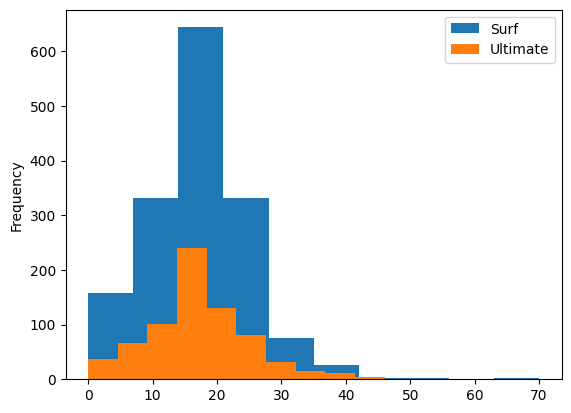

In [59]:
table[table["plan"] == "surf"]["n_gb"].plot(kind= "hist")
table[table["plan"] == "ultimate"]["n_gb"].plot(kind= "hist")
plt.legend(['Surf', 'Ultimate'])
plt.show()

In [60]:
ests_internet=(
table
    .pivot_table(index= 'month', columns= "plan", values= "n_gb", aggfunc= ["mean", "var"])
      
)
ests_messages

mean                     var             
plan          surf   ultimate         surf     ultimate
month                                                  
2018-01  10.500000  15.500000   220.500000   313.666667
2018-02  12.000000  21.571429   386.000000   478.285714
2018-03  15.260870  20.250000   346.565217   654.386364
2018-04  17.400000  22.047619   501.591837   544.147619
2018-05  24.012987  32.103448   847.197198  1297.310345
2018-06  25.298969  29.340426   914.920103   857.620722
2018-07  27.033058  32.830508   923.915565   960.488019
2018-08  28.777778  38.478873  1029.515528  1196.367404
2018-09  30.762887  37.895349  1003.829496  1050.918331
2018-10  33.839662  39.443396  1275.465708  1221.106289
2018-11  32.385159  38.606299  1065.344034  1232.669166
2018-12  38.600629  45.006623  1458.158612  1549.419956

<Axes: ylabel='n_gb'>

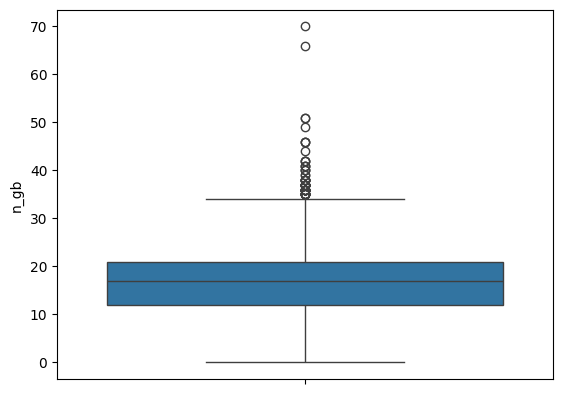

In [61]:
caja_internet= pd.Series(table["n_gb"])
sns.boxplot(caja_internet)

- Los usuarios del plan Surf, utilizan el doble de internet que los usuarios del plan Ultimate cada mes. 
- La media de tráfico de internet de ambos planes cada mes es de unos 18 gb, con un valor mínimo de 0 y un máximo de 35Gb aprox. Existen valores atípios de meses en los que se usó más de 70 gb.

## Ingreso

[Del mismo modo que se ha estudiado el comportamiento de los usuarios, describimos estadísticamente los ingresos de los planes.]

In [62]:
# Ingresos mensual por plan por usuario para plan surf
income_surf= table[table["plan"] == "surf"]
income_surf["monthly_income"]


1        20.00
2        20.00
3        90.09
4        60.00
5        60.00
         ...  
2288    100.00
2289     20.00
2290     70.00
2291     40.00
2292     90.00
Name: monthly_income, Length: 1573, dtype: float64

In [63]:
# Ingresos mensual por plan por usuario para plan ultimate
income_ultimate= table[table["plan"] == "ultimate"]
income_ultimate["monthly_income"]

0       70.0
19      70.0
20      84.0
26      70.0
27      70.0
        ... 
2258    70.0
2259    70.0
2260    70.0
2261    70.0
2277    70.0
Name: monthly_income, Length: 720, dtype: float64

In [64]:
# Ingresos mensuales por plan
income_plan= table.pivot_table(index= "month", 
                                          columns= "plan",
                                          values= "monthly_income",
                                          aggfunc= "sum")
income_plan

plan,surf,ultimate
month,,
2018-01,40.00,280.0
2018-02,309.57,490.0
2018-03,1056.65,896.0
2018-04,2035.53,1533.0
2018-05,3667.37,2051.0
2018-06,4779.80,3367.0
2018-07,7583.56,4242.0
2018-08,10356.85,5173.0
2018-09,11304.67,6195.0


<function matplotlib.pyplot.show(close=None, block=None)>

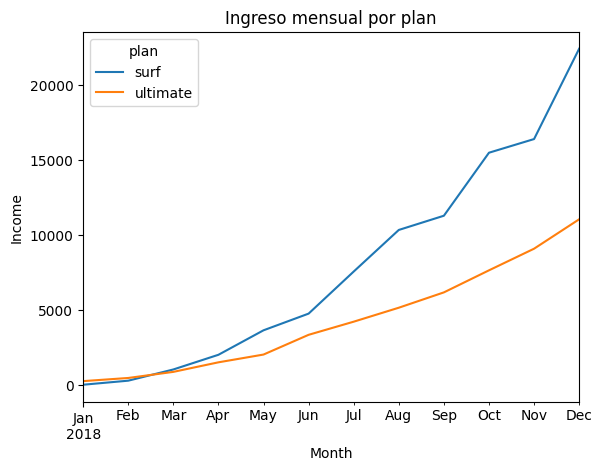

In [65]:
income_plan.plot(                   
                                 kind="line",
                                 title= "Ingreso mensual por plan",
                                 xlabel= "Month",
                                 ylabel= "Income")

plt.show

In [66]:
# Ingresos mensual total por plan:
print("Ingreso total plan surf:", income_surf["monthly_income"].sum())
print("Ingreso total plan ultimate:", income_ultimate["monthly_income"].sum())
print("Ingreso total de ambos planes:", income_surf["monthly_income"].sum() + income_ultimate["monthly_income"].sum())

Ingreso total plan surf: 95491.18
Ingreso total plan ultimate: 52066.0
Ingreso total de ambos planes: 147557.18


In [67]:
# Estadísticas de los ingresos mensuales por plan
ests_income_plan=(
table
    .pivot_table(index= 'month', columns= "plan", values= "monthly_income", aggfunc= ["mean", "var"])
      
)
ests_income_plan

mean                     var            
plan          surf   ultimate         surf    ultimate
month                                                 
2018-01  20.000000  70.000000     0.000000    0.000000
2018-02  34.396667  70.000000   428.276100    0.000000
2018-03  45.941304  74.666667  1512.023512  145.515152
2018-04  40.710600  73.000000  1198.958402  120.400000
2018-05  47.628182  70.724138  1967.540055   15.206897
2018-06  49.276289  71.638298  1988.914046   75.018501
2018-07  62.674050  71.898305  2943.388409  104.472238
2018-08  63.931173  72.859155  3587.494901  154.808451
2018-09  58.271495  72.034884  2260.644980   75.939945
2018-10  65.421224  72.311321  3198.242612  169.606918
2018-11  58.004276  71.708661  2494.182230   94.668416
2018-12  70.557044  73.291391  4604.410868  212.861192



- Los ingresos provenientes del plan Surf son, desde marzo, mucho más altos que los ingresos que provienen del plan Ultimate. Esto se puede explciar, porque en todos los canales, los usuarios del plan Surf exceden sus paquetes, incurriendo en costos adicionales por el uso de los servicios de internet, llamadas y mensajes.
- La media de los ingresos percibidos por los usuarios del plan Ultimate es similar para cada mes, mientras que para los usuarios del plan surf, la media varía cada mes. Po consecuencia de esta volatilidad, la varianza mensual para el plan Surf es mucho mayor en comparacion con las varianzas mensuales del plan Ultimate. 


## Prueba las hipótesis estadísticas


H0= Los ingresos promedio procedente de los usuarios de los planes de llamada Ultimate y Surf son iguales.

H1= Los ingresos promedio procedente de los usuarios de los planes de llamada Ultimate y Surf NO son iguales.

In [68]:
print("Varianza de los ingresos en el plan Surf:", income_surf["monthly_income"].var())
print("Varianza de los ingresos en el plan Ultimate:", income_ultimate["monthly_income"].var())

Varianza de los ingresos en el plan Surf: 3067.835152293878
Varianza de los ingresos en el plan Ultimate: 129.8484855509195


In [69]:
# Prueba las hipótesis

alpha= 0.05
results= st.ttest_ind(income_surf["monthly_income"], income_ultimate["monthly_income"], equal_var=False)

print("valor p: ",results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else: 
    print("No podemos rechazar la hiótesis nula")


valor p:  3.170390548113574e-15
Rechazamos la hipótesis nula



H0= Los ingresos promedios de los usuarios del área NY-NJ son iguales al de los usuarios de otras regiones

H1= Los ingresos promedios de los usuarios del área NY-NJ NO son iguales al de los usuarios de otras regiones

In [70]:
ny_nj= table[table["city"] == "New York-Newark-Jersey City, NY-NJ-PA MSA"]
ny_nj_ing_prom= (ny_nj.pivot_table(index= "user_id",                                         
                                          values= "monthly_income",
                                          aggfunc= "mean")
                                         .rename(columns={'monthly_income': "ing_prom_ny_nj"})
                )
ny_nj_ing_prom


,ing_prom_ny_nj
user_id,
1014,29.420000
1022,56.125000
1024,21.920000
1027,33.333333
1031,70.000000
...,...
1469,100.000000
1482,70.000000
1494,30.625000


In [71]:
regiones= table[table["city"] != "New York-Newark-Jersey City, NY-NJ-PA MSA"]
regiones_ing_prom= (regiones.pivot_table(index= "user_id",                                         
                                          values= "monthly_income",
                                          aggfunc= "mean")
                                        .rename(columns={'monthly_income': 'ing_prom_regs'})
                   )
regiones_ing_prom

,ing_prom_regs
user_id,
1000,70.000000
1001,50.018000
1002,33.333333
1003,158.120000
1004,76.250000
...,...
1492,25.000000
1493,70.000000
1496,28.000000


In [72]:
# Prueba las hipótesis
alpha= 0.05
results_city= st.ttest_ind(ny_nj_ing_prom["ing_prom_ny_nj"], regiones_ing_prom["ing_prom_regs"])

print("valor p: ",results_city.pvalue)

if results_city.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else: 
    print("No podemos rechazar la hiótesis nula")


valor p:  0.48043818838129104
No podemos rechazar la hiótesis nula



- Conclusiones de la primera prueba: Se rechaza la hipótesis nula. Es decir, 
    los ingresos provenientes de los usuarios de los planes Surf y Ultimate NO son iguales.
    Estas diferencias podrían estar explicadas por los patrones de consumo de los usuarios de ambos planes, los usuarios
    del plan Surf incurren en mayores gastos por exceder lso límites de sus paquetes. Miestras que, los usuarios del plan 
    Ultimate se mantienen dentro de sus condiciones sin excederelas, por lo tentop no incurren en costos adicionales. 
    
- Conclusiones de la segunda prueba: Se acepta la hipótesis nula. Es decir, 
    los ingresos promedios de los usuarios del área NY-NJ son iguales al de los usuarios de otras regiones.
    Entonces, no existe diferencias entre regiones.



## Conclusión general

- La duración promedio mensual de las llamadas es similar en ambos planes. 
- Los usuarios del plan Surf envían considerablemente más mensajes que los usuarios del plan ultimate. Casi el doble cada mes.
- Los usuarios del plan Surf utilizan mayor cantidad de tráfico de internet, casi el doble, que los usuarios del plan Ultimate
- Los usuarios del plan Surf incurren en una mayor cantidad de cargos adicionales por sobrepasar sus paquetes, especialmente en mensajes y tráfico de internet.
- Los usuarios del plan Surf son casi el doble que los usuarios del plan Ultimate, 1573 usuarios frente a 720 del plan Ultimate.
- Los ingresos provenientes del plan Surf se han incrementado considerablemente en comparación con los ingresos del plan Ultimate. 
- Con un 95% de confianza, Se rechaza una primera hipótesis nula que sugería que los ingresos de ambos planes son iguales. 
- Con un 95% de confianza, No se puede rechazar la hipótesis nula que propone que los ingresos promedios provenientes de los usuarios del área NY-NJ son iguales al de los usuarios de otras regiones.
- Los patrones de consumo de los usuarios de ambos planes sugieren que los usuarios del plan Surf tengan una mejora en sus condiciones de tarifa, especialmente en cantidad de mensajes y tráfico de internet. La recomendación es que se amplien para que los usuarios no tengan que incurrir en tantos costos adicionales. 
- No existen diferencias significativas en los ingresos provenientes de las distintas regiones estudiadas. En general, son iguales. 